# Outline

- create a model that predicts the category of each article by `LogisticRegression`
- train data is `matichon.json` that contains about 16K articles of Thai news by Matichon between 2015-2018
- X is text of headline or article
- y is category (10 labels)

# Import

In [1]:
import pandas as pd
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

# Load data

- target variable is `category`
- `headline` and `article` are untokenized text

In [2]:
df = pd.read_json('data/matichon.json')
df

headline  \
0      ‡∏ã‡∏≤‡∏≠‡∏∏‡∏Ø‡∏à‡πà‡∏≠‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏ü‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡πÉ‡∏´‡πâ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏´‡∏ç‡∏¥‡∏á‡∏°‡πà‡∏≤‡∏¢-‡∏´‡∏¢‡πà‡∏≤‡∏£‡πâ‡∏≤‡∏á‡∏õ‡∏Å...   
1      "‡πÑ‡∏Å‡πà‡∏≠‡∏π"‡∏ä‡∏µ‡πâ ‡∏ï‡∏π‡πà-‡πÄ‡∏ï‡πâ‡∏ô ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ó‡∏∏‡∏à‡∏£...   
2      ‡πÄ‡∏õ‡∏¥‡∏î‡πÉ‡∏à "‡πÇ‡∏ö‡∏ß‡πå ‡πÅ‡∏ß‡∏ô‡∏î‡∏≤" ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏£‡∏≠‡∏¢‡∏¥‡πâ‡∏°‡πÑ‡∏î‡πâ‡πÄ‡∏ï‡πá‡∏°‡∏ó‡∏µ‡πà‡πÉ‡∏ô‡∏ß...   
3      "‡∏ô‡∏≤‡∏¢ ‡∏ì‡∏†‡∏±‡∏ó‡∏£" ‡∏õ‡∏•‡∏∑‡πâ‡∏°‡∏Ñ‡∏ô‡∏ä‡∏°‡πÅ‡∏ä‡∏°‡∏õ‡πå‡∏Ç‡∏∂‡πâ‡∏ô‡∏õ‡∏Å‡∏ô‡∏¥‡∏ï‡∏¢‡∏™‡∏≤‡∏£‡πÅ‡∏´‡πà‡∏á‡∏õ‡∏µ ...   
4      ‡∏Ñ‡∏≠‡πÅ‡∏ó‡∏ö‡∏´‡∏±‡∏Å! ‡πÅ‡∏°‡πà‡∏¢‡∏Å‡πÅ‡∏´‡πà‡∏Ñ‡∏•‡πâ‡∏≠‡∏á‡∏û‡∏ß‡∏á‡∏°‡∏≤‡∏•‡∏±‡∏¢‡∏±‡∏Å‡∏©‡πå "‡∏ö‡∏≠‡∏¢ ‡∏®‡∏¥‡∏£‡∏¥‡∏ä...   
...                                                  ...   
17104  ‡πÇ‡∏ö‡∏ß‡πå ‡∏ì‡∏±‡∏è‡∏ê‡∏≤  ‡πÅ‡∏à‡πâ‡∏á‡∏Ñ‡∏ß‡∏≤‡∏° ‡∏û‡∏•.‡∏ï.‡∏≠.‡∏®‡∏£‡∏µ‡∏ß‡∏£‡∏≤‡∏´‡πå ‡∏ñ‡∏π‡∏Å‡∏û‡∏≤‡∏î‡∏û‡∏¥‡∏á...   
17105  ‡∏†‡∏≤‡∏û‡∏ö‡∏£‡∏£‡∏¢‡∏≤‡∏Å‡∏≤‡∏® ‡∏Ç‡∏∏‡∏î‡∏ó‡∏≤‡∏á‡∏£‡∏∞‡∏ö‡∏≤‡∏¢‡∏ô‡πâ‡∏≥ ‡πÄ‡∏£‡πà‡∏á‡∏ô‡∏≥ 13 ‡∏ä‡∏µ‡∏ß‡∏¥‡∏ï‡∏≠‡∏≠‡∏Å‡∏à...   
17106  ‡∏™‡∏ô‡∏ä.‡∏ú‡πà‡∏≤‡∏ô‡∏û.‡∏£.‡∏ö.‡∏™‡∏á‡∏Ü‡πå 3 ‡∏ß‡∏≤‡∏£‡∏∞‡∏£‡∏ß‡∏î ‡∏û‡∏£‡∏∞‡∏°‡∏´‡∏≤‡∏Å‡∏©‡∏±‡∏ï‡∏£‡∏¥‡∏¢‡πå‡∏ó‡∏£‡∏á...   
17107  ‡∏ô‡∏≤‡∏ô‡∏≤‡∏ó‡∏£‡∏£‡∏®‡∏ô‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏±‡∏ö¬ù‡∏´‡∏°‡∏≠¬û 5‡∏•‡πâ‡∏≤‡∏ô‡∏ö. ‡∏™‡∏Å‡∏±‡∏î‡πÄ‡∏ö‡∏µ‡πâ‡∏¢‡∏ß...   
17108  ‡∏ß‡∏≠‡∏ô!! ‡∏ô‡∏≤‡∏¢‡∏Å ‡∏™.‡∏õ‡∏™.‡∏Å‡∏ä.‡∏ä‡∏á '‡∏ö‡∏¥‡πä‡∏Å‡∏à‡∏¥‡∏ô' ‡∏ä‡πà‡∏ß‡∏¢ ‡∏ô.‡∏£.‡πÄ‡∏≠‡∏Å‡∏ä‡∏ô...   

                                                 article                date  \
0      (2 ‡∏ò.‡∏Ñ.58) ‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå‡∏≠‡∏±‡∏• ‡∏£‡∏¥‡∏¢‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ã‡∏≤‡∏≠‡∏∏‡∏î... 2015-12-04 03:35:18   
1      "‡∏ö‡∏¥‡πä‡∏Å‡∏õ‡πâ‡∏≠‡∏°" ‡πÅ‡∏à‡∏á ‡∏Ñ‡∏£‡∏°. ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏¢‡∏≤‡∏¢‡∏≤‡∏°‡∏¢‡∏∏‡∏¢‡∏á‡∏õ‡∏•‡∏∏‡∏Å‡∏õ‡∏±‡πà‡∏ô‡πÉ‡∏´... 2015-12-04 04:10:49   
2      ‡πÅ‡∏°‡πâ‡∏à‡∏∞‡∏ó‡∏≥‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏†‡∏£‡∏£‡∏¢‡∏≤‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏°‡∏≤‡πÄ‡∏ù‡πâ‡∏≤‡∏õ‡∏≠ ‚Äì ‡∏ó‡∏§‡∏©‡∏é‡∏µ ‡∏™‡∏´‡∏ß‡∏á‡∏©... 2015-12-04 06:30:11   
3      ‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏î‡∏≤‡∏£‡∏≤‡∏´‡∏ô‡∏∏‡πà‡∏°‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≠‡∏°‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö‡πÅ‡∏ô‡πà‡∏ô ‡∏Å‡∏£‡∏∞‡πÅ‡∏™‡∏°‡∏≤‡πÅ‡∏£... 2015-12-04 07:10:26   
4      ‡πÅ‡∏™‡∏î‡∏á‡∏î‡∏µ‡∏à‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏≠‡∏Å‡∏ñ‡∏π‡∏Å‡πÉ‡∏à‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö ‡∏à‡∏ô‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏û‡∏ß‡∏á‡∏°‡∏≤... 2015-12-05 05:26:20   
...                                                  ...                 ...   
17104  ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 5 ‡∏Å.‡∏Ñ. ‡∏ó‡∏µ‡πà ‡∏™‡∏ô.‡∏û‡∏ç‡∏≤‡πÑ‡∏ó ‡∏ô.‡∏™.‡∏ì‡∏±‡∏è‡∏ê‡∏≤ ‡∏°‡∏´‡∏±‡∏ó... 2018-07-05 13:25:45   
17105  ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 5 ‡∏Å‡∏£‡∏Å‡∏é‡∏≤‡∏Ñ‡∏° ‡πÄ‡∏à‡πâ‡∏≤‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏Ç‡∏∏‡∏î‡∏ó‡∏≤‡∏á‡∏£‡∏∞‡∏ö‡∏≤‡∏¢‡∏ô‡πâ‡∏≥‡∏ó‡∏µ‡πà‡∏î... 2018-07-05 13:33:10   
17106  ‡∏™‡∏ô‡∏ä.‡∏ú‡πà‡∏≤‡∏ô ‡∏û.‡∏£.‡∏ö.‡∏™‡∏á‡∏Ü‡πå 3 ‡∏ß‡∏≤‡∏£‡∏∞‡∏£‡∏ß‡∏î "‡∏ß‡∏¥‡∏©‡∏ì‡∏∏" ‡πÅ‡∏à‡∏á‡∏™‡∏≤‡∏£‡∏∞‡∏™... 2018-07-05 13:33:27   
17107  ‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏ ‚Äì ‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏ì‡∏µ‡∏ó‡∏µ‡πà ‡∏Å‡∏£‡∏∞‡∏ó‡∏£‡∏ß‡∏á‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ò‡∏¥‡∏Å‡∏≤‡∏£ (‡∏®‡∏ò.) ... 2018-07-05 13:53:26   
17108  ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà 5 ‡∏Å‡∏£‡∏Å‡∏£‡∏é‡∏≤‡∏Ñ‡∏° ‡∏ô‡∏≤‡∏¢‡∏®‡∏∏‡∏†‡πÄ‡∏™‡∏è‡∏ê‡πå ‡∏Ñ‡∏ì‡∏≤‡∏Å‡∏π‡∏• ‡∏ô‡∏≤‡∏¢‡∏Å... 2018-07-06 04:46:18   

            category                                                url  \
0            foreign        https://www.matichon.co.th/foreign/news_293   
1           politics       https://www.matichon.co.th/politics/news_329   
2      entertainment  https://www.matichon.co.th/entertainment/news_375   
3      entertainment  https://www.matichon.co.th/entertainment/news_393   
4      entertainment  https://www.matichon.co.th/entertainment/news_445   
...              ...                                                ...   
17104       politics   https://www.matichon.co.th/politics/news_1029607   
17105         region     https://www.matichon.co.th/region/news_1029619   
17106       politics   https://www.matichon.co.th/politics/news_1029636   
17107      education  http

In [3]:
## drop "date", "url", and "id"
df = df.drop(columns=['date','url','id'])
df.head()

headline  \
0  ‡∏ã‡∏≤‡∏≠‡∏∏‡∏Ø‡∏à‡πà‡∏≠‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏ü‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡πÉ‡∏´‡πâ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏´‡∏ç‡∏¥‡∏á‡∏°‡πà‡∏≤‡∏¢-‡∏´‡∏¢‡πà‡∏≤‡∏£‡πâ‡∏≤‡∏á‡∏õ‡∏Å...   
1  "‡πÑ‡∏Å‡πà‡∏≠‡∏π"‡∏ä‡∏µ‡πâ ‡∏ï‡∏π‡πà-‡πÄ‡∏ï‡πâ‡∏ô ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ó‡∏∏‡∏à‡∏£...   
2  ‡πÄ‡∏õ‡∏¥‡∏î‡πÉ‡∏à "‡πÇ‡∏ö‡∏ß‡πå ‡πÅ‡∏ß‡∏ô‡∏î‡∏≤" ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏£‡∏≠‡∏¢‡∏¥‡πâ‡∏°‡πÑ‡∏î‡πâ‡πÄ‡∏ï‡πá‡∏°‡∏ó‡∏µ‡πà‡πÉ‡∏ô‡∏ß...   
3  "‡∏ô‡∏≤‡∏¢ ‡∏ì‡∏†‡∏±‡∏ó‡∏£" ‡∏õ‡∏•‡∏∑‡πâ‡∏°‡∏Ñ‡∏ô‡∏ä‡∏°‡πÅ‡∏ä‡∏°‡∏õ‡πå‡∏Ç‡∏∂‡πâ‡∏ô‡∏õ‡∏Å‡∏ô‡∏¥‡∏ï‡∏¢‡∏™‡∏≤‡∏£‡πÅ‡∏´‡πà‡∏á‡∏õ‡∏µ ...   
4  ‡∏Ñ‡∏≠‡πÅ‡∏ó‡∏ö‡∏´‡∏±‡∏Å! ‡πÅ‡∏°‡πà‡∏¢‡∏Å‡πÅ‡∏´‡πà‡∏Ñ‡∏•‡πâ‡∏≠‡∏á‡∏û‡∏ß‡∏á‡∏°‡∏≤‡∏•‡∏±‡∏¢‡∏±‡∏Å‡∏©‡πå "‡∏ö‡∏≠‡∏¢ ‡∏®‡∏¥‡∏£‡∏¥‡∏ä...   

                                             article       category  
0  (2 ‡∏ò.‡∏Ñ.58) ‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå‡∏≠‡∏±‡∏• ‡∏£‡∏¥‡∏¢‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ã‡∏≤‡∏≠‡∏∏‡∏î...        foreign  
1  "‡∏ö‡∏¥‡πä‡∏Å‡∏õ‡πâ‡∏≠‡∏°" ‡πÅ‡∏à‡∏á ‡∏Ñ‡∏£‡∏°. ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏¢‡∏≤‡∏¢‡∏≤‡∏°‡∏¢‡∏∏‡∏¢‡∏á‡∏õ‡∏•‡∏∏‡∏Å‡∏õ‡∏±‡πà‡∏ô‡πÉ‡∏´...       politics  
2  ‡πÅ‡∏°‡πâ‡∏à‡∏∞‡∏ó‡∏≥‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏†‡∏£‡∏£‡∏¢‡∏≤‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏°‡∏≤‡πÄ‡∏ù‡πâ‡∏≤‡∏õ‡∏≠ ‚Äì ‡∏ó‡∏§‡∏©‡∏é‡∏µ ‡∏™‡∏´‡∏ß‡∏á‡∏©...  entertainment  
3  ‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏î‡∏≤‡∏£‡∏≤‡∏´‡∏ô‡∏∏‡πà‡∏°‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≠‡∏°‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö‡πÅ‡∏ô‡πà‡∏ô ‡∏Å‡∏£‡∏∞‡πÅ‡∏™‡∏°‡∏≤‡πÅ‡∏£...  entertainment  
4  ‡πÅ‡∏™‡∏î‡∏á‡∏î‡∏µ‡∏à‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏≠‡∏Å‡∏ñ‡∏π‡∏Å‡πÉ‡∏à‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö ‡∏à‡∏ô‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏û‡∏ß‡∏á‡∏°‡∏≤...  entertainment

In [4]:
## value counts of target variable
df.category.value_counts()

politics         3135
region           2655
crime            2141
local            1938
publicize        1481
foreign          1329
economy          1249
sport            1202
education        1053
entertainment     926
Name: category, dtype: int64

# Tokenize & train-test split

- it may take more than 2 minutes
- you can save the tokenized file by `df.to_json('XXX.json', orient='records')`

In [5]:
df['headline_tokens'] = df.headline.apply(word_tokenize)
df['article_tokens'] = df.article.apply(word_tokenize)

In [6]:
df.head()

headline  \
0  ‡∏ã‡∏≤‡∏≠‡∏∏‡∏Ø‡∏à‡πà‡∏≠‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏ü‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡πÉ‡∏´‡πâ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏´‡∏ç‡∏¥‡∏á‡∏°‡πà‡∏≤‡∏¢-‡∏´‡∏¢‡πà‡∏≤‡∏£‡πâ‡∏≤‡∏á‡∏õ‡∏Å...   
1  "‡πÑ‡∏Å‡πà‡∏≠‡∏π"‡∏ä‡∏µ‡πâ ‡∏ï‡∏π‡πà-‡πÄ‡∏ï‡πâ‡∏ô ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ó‡∏∏‡∏à‡∏£...   
2  ‡πÄ‡∏õ‡∏¥‡∏î‡πÉ‡∏à "‡πÇ‡∏ö‡∏ß‡πå ‡πÅ‡∏ß‡∏ô‡∏î‡∏≤" ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏£‡∏≠‡∏¢‡∏¥‡πâ‡∏°‡πÑ‡∏î‡πâ‡πÄ‡∏ï‡πá‡∏°‡∏ó‡∏µ‡πà‡πÉ‡∏ô‡∏ß...   
3  "‡∏ô‡∏≤‡∏¢ ‡∏ì‡∏†‡∏±‡∏ó‡∏£" ‡∏õ‡∏•‡∏∑‡πâ‡∏°‡∏Ñ‡∏ô‡∏ä‡∏°‡πÅ‡∏ä‡∏°‡∏õ‡πå‡∏Ç‡∏∂‡πâ‡∏ô‡∏õ‡∏Å‡∏ô‡∏¥‡∏ï‡∏¢‡∏™‡∏≤‡∏£‡πÅ‡∏´‡πà‡∏á‡∏õ‡∏µ ...   
4  ‡∏Ñ‡∏≠‡πÅ‡∏ó‡∏ö‡∏´‡∏±‡∏Å! ‡πÅ‡∏°‡πà‡∏¢‡∏Å‡πÅ‡∏´‡πà‡∏Ñ‡∏•‡πâ‡∏≠‡∏á‡∏û‡∏ß‡∏á‡∏°‡∏≤‡∏•‡∏±‡∏¢‡∏±‡∏Å‡∏©‡πå "‡∏ö‡∏≠‡∏¢ ‡∏®‡∏¥‡∏£‡∏¥‡∏ä...   

                                             article       category  \
0  (2 ‡∏ò.‡∏Ñ.58) ‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå‡∏≠‡∏±‡∏• ‡∏£‡∏¥‡∏¢‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ó‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ã‡∏≤‡∏≠‡∏∏‡∏î...        foreign   
1  "‡∏ö‡∏¥‡πä‡∏Å‡∏õ‡πâ‡∏≠‡∏°" ‡πÅ‡∏à‡∏á ‡∏Ñ‡∏£‡∏°. ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏û‡∏¢‡∏≤‡∏¢‡∏≤‡∏°‡∏¢‡∏∏‡∏¢‡∏á‡∏õ‡∏•‡∏∏‡∏Å‡∏õ‡∏±‡πà‡∏ô‡πÉ‡∏´...       politics   
2  ‡πÅ‡∏°‡πâ‡∏à‡∏∞‡∏ó‡∏≥‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà‡∏†‡∏£‡∏£‡∏¢‡∏≤‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏°‡∏≤‡πÄ‡∏ù‡πâ‡∏≤‡∏õ‡∏≠ ‚Äì ‡∏ó‡∏§‡∏©‡∏é‡∏µ ‡∏™‡∏´‡∏ß‡∏á‡∏©...  entertainment   
3  ‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏î‡∏≤‡∏£‡∏≤‡∏´‡∏ô‡∏∏‡πà‡∏°‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≠‡∏°‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö‡πÅ‡∏ô‡πà‡∏ô ‡∏Å‡∏£‡∏∞‡πÅ‡∏™‡∏°‡∏≤‡πÅ‡∏£...  entertainment   
4  ‡πÅ‡∏™‡∏î‡∏á‡∏î‡∏µ‡∏à‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏≠‡∏Å‡∏ñ‡∏π‡∏Å‡πÉ‡∏à‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö ‡∏à‡∏ô‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏û‡∏ß‡∏á‡∏°‡∏≤...  entertainment   

                                     headline_tokens  \
0  [‡∏ã‡∏≤‡∏≠‡∏∏‡∏Ø, ‡∏à‡πà‡∏≠, ‡πÄ‡∏õ‡∏¥‡∏î‡πÑ‡∏ü‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß, ‡πÉ‡∏´‡πâ, ‡∏™‡∏¥‡∏ó‡∏ò‡∏¥, ‡∏´‡∏ç‡∏¥‡∏á, ‡∏°‡πà...   
1  [", ‡πÑ‡∏Å‡πà‡∏≠‡∏π, ", ‡∏ä‡∏µ‡πâ,  , ‡∏ï‡∏π‡πà, -, ‡πÄ‡∏ï‡πâ‡∏ô,  , ‡πÑ‡∏°‡πà, ‡πÑ‡∏î...   
2  [‡πÄ‡∏õ‡∏¥‡∏î‡πÉ‡∏à,  , ", ‡πÇ‡∏ö‡∏ß‡πå,  , ‡πÅ‡∏ß‡∏ô‡∏î‡∏≤, ",  , ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á, ...   
3  [", ‡∏ô‡∏≤‡∏¢,  , ‡∏ì, ‡∏†‡∏±‡∏ó‡∏£, ",  , ‡∏õ‡∏•‡∏∑‡πâ‡∏°, ‡∏Ñ‡∏ô, ‡∏ä‡∏°, ‡πÅ‡∏ä‡∏°‡∏õ...   
4  [‡∏Ñ‡∏≠, ‡πÅ‡∏ó‡∏ö, ‡∏´‡∏±‡∏Å, !,  , ‡πÅ‡∏°‡πà‡∏¢‡∏Å, ‡πÅ‡∏´‡πà, ‡∏Ñ‡∏•‡πâ‡∏≠‡∏á, ‡∏û‡∏ß‡∏á‡∏°‡∏≤‡∏•...   

                                      article_tokens  
0  [(, 2,  , ‡∏ò.‡∏Ñ., 58, ),  , ‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå, ‡∏≠‡∏±‡∏•,  ...  
1  [", ‡∏ö‡∏¥‡πä‡∏Å, ‡∏õ‡πâ‡∏≠‡∏°, ",  , ‡πÅ‡∏à‡∏á,  , ‡∏Ñ‡∏£‡∏°.,  , ‡∏°‡∏µ, ‡∏Ñ‡∏ß‡∏≤...  
2  [‡πÅ‡∏°‡πâ, ‡∏à‡∏∞, ‡∏ó‡∏≥‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏µ‡πà, ‡∏†‡∏£‡∏£‡∏¢‡∏≤, ‡∏ó‡∏µ‡πà, ‡∏î‡∏µ, ‡∏°‡∏≤, ‡πÄ‡∏ù‡πâ‡∏≤,...  
3  [‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡∏ô, ‡∏î‡∏≤‡∏£‡∏≤, ‡∏´‡∏ô‡∏∏‡πà‡∏°, ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠, ‡∏´‡∏≠‡∏°, ‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö, ‡πÅ...  
4  [‡πÅ‡∏™‡∏î‡∏á, ‡∏î‡∏µ, ‡∏à‡∏ô, ‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà, ‡∏ñ‡∏π‡∏Å‡∏≠‡∏Å‡∏ñ‡∏π‡∏Å‡πÉ‡∏à, ‡πÅ‡∏ü‡∏ô‡∏Ñ‡∏•‡∏±‡∏ö,  ...

In [7]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

print(train.shape)
print(test.shape)

(14542, 5)
(2567, 5)


# Feature Engineering


### featurize function
- input is tokenized sentence (list of str)
- output is feature dictionary `{feature: 1}` 
- bag-of-words, but binary value (not actual count, just existence)
- use *unigram only* or *unigram & bigram*
- use not only tokens, but also other features, e.g. text length

~~~python
['the','boy','love','the','dog'] 
-> {'LENGTH':5, 'the':1, 'boy':1, 'love':1, 'dog':1, 'the|boy':1, 'boy|love':1, 'love|the':1, 'the|dog':1}
~~~

In [8]:
def featurize_unigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add text length
        feat_dic['LENGTH'] = len(tokens)
    return feat_dic

def featurize_bigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add bigram
        if i < len(tokens) - 1:
            bigram = '|'.join(tokens[i:i+2]) # e.g. ‡∏â‡∏±‡∏ô|‡πÑ‡∏õ
            feat_dic[bigram] = 1
        ## add text length
        feat_dic['text_length'] = len(tokens)
    return feat_dic


### all-in-one function

In [9]:
def train_predict(X_column_name, featurize_function_name, show_confusion_matrix=False, return_model=False):
    ## make X : featurize each record as dictionary
    X_train = train[X_column_name].apply(featurize_function_name)
    X_test = test[X_column_name].apply(featurize_function_name)

    ## make y
    y_train = train['category']
    y_test = test['category']

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
        disp.plot(xticks_rotation=80)

    # return model
    if return_model:
        return pipe

# Model Comparison

### use `headline` + unigram feature

In [10]:
train_predict('headline_tokens', featurize_unigram)

               precision    recall  f1-score   support

        crime       0.62      0.66      0.64       304
      economy       0.76      0.72      0.74       181
    education       0.78      0.67      0.72       171
entertainment       0.76      0.79      0.78       144
      foreign       0.77      0.72      0.74       196
        local       0.41      0.39      0.40       283
     politics       0.78      0.85      0.82       492
    publicize       0.77      0.78      0.78       236
       region       0.60      0.57      0.59       377
        sport       0.88      0.92      0.90       183

     accuracy                           0.70      2567
    macro avg       0.71      0.71      0.71      2567
 weighted avg       0.70      0.70      0.70      2567



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### use `headline` + bigram feature

In [11]:
train_predict('headline_tokens', featurize_bigram)

               precision    recall  f1-score   support

        crime       0.64      0.68      0.66       304
      economy       0.74      0.72      0.73       181
    education       0.74      0.65      0.69       171
entertainment       0.74      0.77      0.76       144
      foreign       0.79      0.72      0.75       196
        local       0.43      0.34      0.38       283
     politics       0.80      0.84      0.82       492
    publicize       0.78      0.81      0.79       236
       region       0.59      0.64      0.61       377
        sport       0.90      0.89      0.90       183

     accuracy                           0.70      2567
    macro avg       0.71      0.71      0.71      2567
 weighted avg       0.70      0.70      0.70      2567



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### use `article` + unigram feature

In [12]:
train_predict('article_tokens', featurize_unigram)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.68      0.67      0.67       304
      economy       0.81      0.83      0.82       181
    education       0.87      0.76      0.81       171
entertainment       0.86      0.93      0.90       144
      foreign       0.94      0.91      0.93       196
        local       0.46      0.41      0.43       283
     politics       0.84      0.88      0.86       492
    publicize       0.88      0.87      0.87       236
       region       0.67      0.70      0.68       377
        sport       0.94      0.98      0.96       183

     accuracy                           0.78      2567
    macro avg       0.80      0.79      0.79      2567
 weighted avg       0.77      0.78      0.77      2567



### use `article` + bigram feature

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.66      0.70      0.68       304
      economy       0.84      0.83      0.84       181
    education       0.87      0.80      0.84       171
entertainment       0.88      0.94      0.91       144
      foreign       0.93      0.92      0.93       196
        local       0.43      0.46      0.44       283
     politics       0.87      0.87      0.87       492
    publicize       0.90      0.88      0.89       236
       region       0.68      0.63      0.65       377
        sport       0.97      0.98      0.98       183

     accuracy                           0.78      2567
    macro avg       0.80      0.80      0.80      2567
 weighted avg       0.78      0.78      0.78      2567



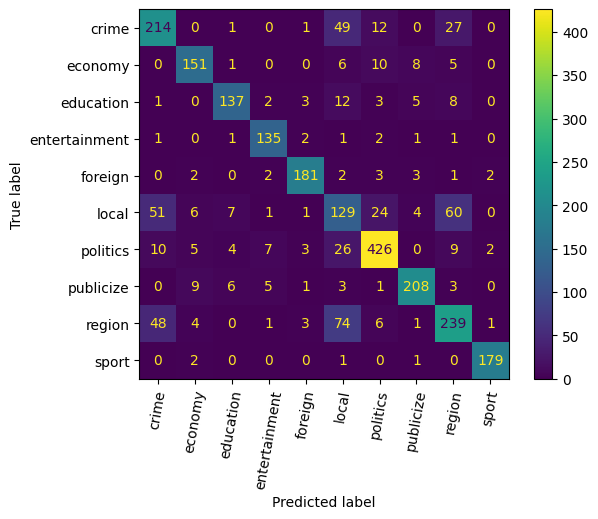

In [13]:
model = train_predict('article_tokens', featurize_bigram, return_model=True, show_confusion_matrix=True) ## return model to check coefficient

- the score of the model using `article` and bigram feature is the best
- `local` is relatively low score (confused with `region`), while `sport` and `foreign` are very high 

# check the coefficient of the model
- coefficients show "for which category, which words are important" 
- `model` is a pipeline of `DictVectorizer` and `LogisticRegression`
- feature names (vocabulary) are in `model.named_steps['dv'].get_feature_names_out()`
- coefficients are in `model.named_steps['logreg'].coef_`, which is (`number of class` * `number of features`) array
- class names are in `model.named_steps['logreg'].classes_`

In [14]:
logreg = model.named_steps['logreg']
dv = model.named_steps['dv']

coef_df = pd.DataFrame(logreg.coef_, index=logreg.classes_, columns=dv.get_feature_names_out())
coef_df

\n      \n|      \n|      \n|      \n|      \n|       \
crime         -0.078384 -0.017612 -0.025569 -0.018058 -0.001461 -0.000333   
economy        0.036606  0.032975  0.144117  0.016232 -0.000832 -0.001159   
education     -0.339866 -0.049083 -0.023163 -0.003677 -0.003165 -0.001687   
entertainment  0.250460  0.043234  0.025208  0.017660  0.013350  0.009298   
foreign        0.107929 -0.037691 -0.015158 -0.007283 -0.002282 -0.001848   
local          0.065164  0.067781 -0.015737  0.009237 -0.004626 -0.002843   
politics       0.052604 -0.063254 -0.019349 -0.005557 -0.002881  0.002567   
publicize     -0.133243  0.092502 -0.030912  0.003838  0.004129  0.000762   
region        -0.083275 -0.072931 -0.026139 -0.006699 -0.000120 -0.002828   
sport          0.122007  0.004079 -0.013298 -0.005691 -0.002113 -0.001928   

               \n|        \n|          \n|           \n|              ...  \
crime          -0.001860    -0.007466     -0.000420        -0.003561  ...   
economy        -0.001191    -0.001472     -0.000274        -0.002812  ...   
education      -0.001834    -0.004236     -0.000550        -0.006174  ...   
entertainment   0.011807    -0.001776      0.001865        -0.002691  ...   
foreign        -0.001354    -0.001547     -0.000444        -0.002808  ...   
local          -0.001804    -0.005963     -0.001788        -0.014547  ...   
politics       -0.002156     0.001397      0.000651         0.003116  ...   
publicize      -0.002781    -0.002110     -0.000744        -0.003287  ...   
region          0.002550     0.026302      0.002046         0.036842  ...   
sport          -0.001379    -0.003129     -0.000342        -0.004078  ...   

                      ü§£       ü§£|         ü§£ü§£      ü§£ü§£|        ü§£ü§£ü§£     ü§£ü§£ü§£|   \
crime         -0.000100 -0.000100 -0.000088 -0.000088 -0.000094 -0.000094   
economy       -0.000034 -0.000034 -0.000078 -0.000078 -0.000083 -0.000083   
education     -0.000066 -0.000066 -0.000093 -0.000093 -0.000093 -0.000093   
entertainment  0.000781  0.000781  0.000893  0.000893  0.000998  0.000998   
foreign       -0.000018 -0.000018 -0.000087 -0.000087 -0.000109 -0.000109   
local         -0.000094 -0.000094 -0.000111 -0.000111 -0.000151 -0.000151   
politics      -0.000211 -0.000211 -0.000142 -0.000142 -0.000123 -0.000123   
publicize     -0.000080 -0.000080 -0.000093 -0.000093 -0.000097 -0.000097   
region        -0.000128 -0.000128 -0.000091 -0.000091 -0.000109 -0.000109   
sport         -0.000049 -0.000049 -0.000110 -0.000110 -0.000140 -0.000140   

                      ü§´       ü§´|       ü§¨ü§¨ü§¨ü§¨  ü§¨ü§¨ü§¨ü§¨|‡πÄ‡∏Å‡πà‡∏á  
crime         -0.000166 -0.000166 -0.000209  -0.000209  
economy       -0.000153 -0.000153 -0.000105  -0.000105  
education     -0.000175 -0.000175 -0.000132  -0.000132  
entertainment  0.001976  0.001976  0.001587   0.001587  
foreign       -0.000289 -0.000289 -0.000239  -0.000239  
local         -0.000241 -0.000241 -0.000237  -0.000237  
politics      -0.000271 -0.000271 -0.000281  -0.000281  
publicize     -0.000175 -0.000175 -0.000088  -0.000088  
region        -0.000255 -0.000255 -0.000173  -0.000173  
sport         -0.000250 -0.000250 -0.000123  -0.000123  

[10 rows x 1127061 columns]

In [15]:
## top 10 words for crime
## 9 of 10 are unigram feature
coef_df.loc['crime'].sort_values(ascending=False)[:10]

‡∏Ñ‡∏î‡∏µ                      0.386117
‡∏ï‡∏≥‡∏£‡∏ß‡∏à                    0.345378
 |‡∏≠‡∏≤‡∏¢‡∏∏                   0.286158
‡πÄ‡∏°‡∏∑‡πà‡∏≠|‡πÄ‡∏ß‡∏•‡∏≤               0.285867
‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà                   0.283716
‡∏™‡∏ô.                      0.275394
‡∏™‡∏≠‡∏ö‡∏™‡∏ß‡∏ô                   0.268703
‡∏ñ‡∏ô‡∏ô                      0.253979
‡∏™‡∏≥‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏ï‡∏≥‡∏£‡∏ß‡∏à‡πÅ‡∏´‡πà‡∏á‡∏ä‡∏≤‡∏ï‡∏¥    0.253664
‡∏û.‡∏ï.‡∏≠.                   0.251302
Name: crime, dtype: float64

In [16]:
## top 10 words for sports
coef_df.loc['sport'].sort_values(ascending=False)[:10]

‡∏ó‡∏µ‡∏°           0.674310
 |"           0.440542
‡∏Å‡∏µ‡∏¨‡∏≤          0.426836
"|            0.384997
‡∏Å‡∏≤‡∏£‡πÅ‡∏Ç‡πà‡∏á‡∏Ç‡∏±‡∏ô    0.381531
‡∏ó‡∏µ‡∏°|‡∏ä‡∏≤‡∏ï‡∏¥      0.367852
‡∏®‡∏∂‡∏Å           0.359378
"             0.341969
‡∏ü‡∏∏‡∏ï‡∏ö‡∏≠‡∏•        0.340671
‡πÅ‡∏ä‡∏°‡∏õ‡πå         0.333299
Name: sport, dtype: float64

# If remove stopwords/punctuations?
- there are a lot of punctuation/stopwords in the result above
- clean data and tokenize again 
- allowed token pattern is `[A-Za-z0-9‡∏Å-‡πô\-\.]`
- not use bigram, because many words are removed

In [17]:
STOPWORDS = thai_stopwords()

def my_tokenize(text):
    text = text.replace('\"', '') # remove double quotation
    text = text.replace('\'', '') # remove single quotation
    tokens = word_tokenize(text, keep_whitespace=False)
    tokens = [token for token in tokens if re.match(r'[A-Za-z0-9‡∏Å-‡πô\-\.]+', token)]
    return tokens

In [18]:
df['article_tokens'] = df.article.apply(my_tokenize)
train_predict('article_tokens', featurize_unigram)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.68      0.67      0.67       304
      economy       0.81      0.83      0.82       181
    education       0.87      0.76      0.81       171
entertainment       0.86      0.93      0.90       144
      foreign       0.94      0.91      0.93       196
        local       0.46      0.41      0.43       283
     politics       0.84      0.88      0.86       492
    publicize       0.88      0.87      0.87       236
       region       0.67      0.70      0.68       377
        sport       0.94      0.98      0.96       183

     accuracy                           0.78      2567
    macro avg       0.80      0.79      0.79      2567
 weighted avg       0.77      0.78      0.77      2567



- The result is almost the same as the previous uniigram model
- Removing stopwords/punctuation did not help to improve the model in this case

# Further Improvement

- To change tokenizing method may be less helpful
- Must modify featurize function
    - each category has some specific characteristics except for word itself
    - e.g. `economy` may contain many digit characters -> try to use the feature such as `digit_char_ratio` 
- show confusion matrix in oreder to detect which label is often misunderstood for which label